# Spline interpolation

This notebook details how to interpolate functions using different methods, including linear interpolation and spline interpolation. It also shows Python libraries that perform interpolation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Linear interpolation (linear splines)

This is a naive interpolation method that connects points in a function using straight lines. 

In [2]:
x1 = np.array([1,2,3])
y1 = np.array([5,8,25])

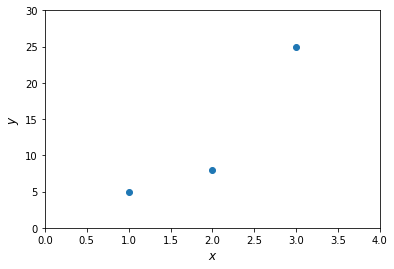

In [3]:
plt.plot(x1,y1,'o')
plt.xlim(0,4)
plt.ylim(0,30)
plt.xlabel('$x$',fontsize=12)
plt.ylabel('$y$',fontsize=12);

In [4]:
n1 = len(x1)

There will be $m-1$ linear splines, so here we will have $3-1 = 2$ splines we need to determine.

Let $(x_i,y_i)$ be the $m$ data points we are working with. We have $m=3$ data points here. Let $a_i$ be the slopes of the splines and $b_i$ be the intercepts.

The conditions for our linear splines are the following:

$$ y_1 = a_1 x_1 + b_1 $$

$$ y_2 = a_1 x_2 + b_1 $$

$$ y_2 = a_2 x_2 + b_2 $$

$$ y_3 = a_2 x_3 + b_2 $$

As a matrix equation, this is

$$ \begin{pmatrix}
x_1 & 1 & 0 & 0 \\
x_2 & 1 & 0 & 0 \\
0   & 0 & x_2 & 1 \\
0   & 0 & x_3 & 1 \\
\end{pmatrix}
\begin{pmatrix}
a_1 \\ b_1 \\ a_2 \\ b_2
\end{pmatrix}
=
\begin{pmatrix}
y_1 \\ y_2 \\ y_2 \\ y_3
\end{pmatrix}
$$

In [5]:
# set up array to hold parameters
data1 = np.array([y1[0],y1[1],y1[1],y1[2]])
matrix1 = np.array([[x1[0], 1, 0, 0],
                    [x1[1], 1, 0, 0],
                    [0   , 0, x1[1], 1],
                    [0   , 0, x1[2], 1],
                   ])

In [6]:
params1 = np.linalg.solve(matrix1, data1)

In [7]:
print(params1)

[  3.   2.  17. -26.]


So the splines are

$$ y = \begin{cases}
3x + 2,& \quad 1 \leq x < 2 \\
17x -26,& \quad 2 \leq x \leq 3 \\
\end{cases}$$

This is a pain though. Let's use the built-in `scipy` functions to do it instead and save the hassle and possible mistakes

In [8]:
from scipy.interpolate import interp1d

In [9]:
splines1 = interp1d(x1, y1)
# this is a function that will give you the interpolant values at different x

In [10]:
npred1 = 100
xpred1 = np.linspace(1,3,num=npred1)
ypred1 = np.empty(npred1)
for i in range(0,npred1):
    ypred1[i] = splines1(xpred1[i])

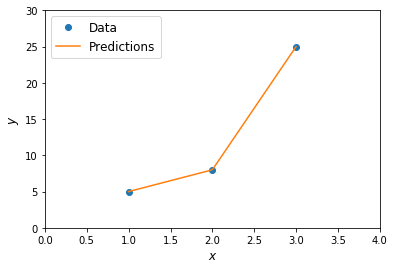

In [11]:
plt.plot(x1,y1,'o', label='Data')
plt.plot(xpred1, ypred1, '-', label='Predictions')
plt.xlim(0,4)
plt.ylim(0,30)
plt.xlabel('$x$',fontsize=12)
plt.ylabel('$y$',fontsize=12)
plt.legend(fontsize=12);

In [12]:
print(splines1(2.5))

16.5


In [13]:
print(splines1(3))

25.0


Calling at a point outside the interval results in an error

In [14]:
splines1(0.5)

ValueError: A value in x_new is below the interpolation range.

## Cubic splines

Use the vehicular stopping distance data from before

In [15]:
x2 = np.array([20,25,30,35,40,45,50,55,60,65,70,75,80])
y2 = np.array([42,56,73.5,91.5,116,142.5,173,209.5,248,292.5,343,401,464])

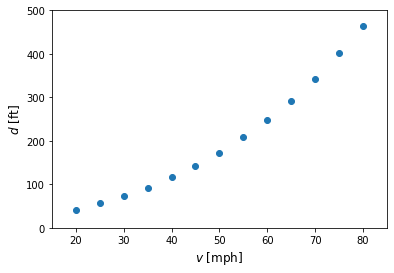

In [16]:
plt.plot(x2,y2,'o', label='Data')
plt.xlim(15,85)
plt.ylim(0,500)
plt.xlabel('$v$ [mph]',fontsize=12)
plt.ylabel('$d$ [ft]',fontsize=12);

In [17]:
splines2 = interp1d(x2, y2, kind='cubic')

In [18]:
npred2 = 100
xpred2 = np.linspace(20,80,num=npred2)
ypred2 = np.empty(npred2)
for i in range(0,npred2):
    ypred2[i] = splines2(xpred2[i])

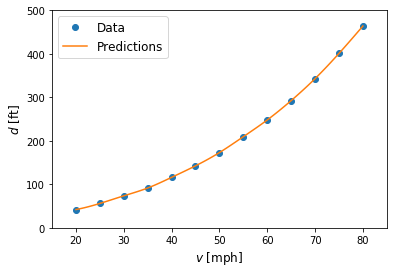

In [19]:
plt.plot(x2,y2,'o', label='Data')
plt.plot(xpred2, ypred2, '-', label='Predictions')
plt.xlim(15,85)
plt.ylim(0,500)
plt.xlabel('$v$ [mph]',fontsize=12)
plt.ylabel('$d$ [ft]',fontsize=12)
plt.legend(fontsize=12);

Compare with linear interpolation

In [20]:
splines3 = interp1d(x2,y2)
ypred2_linear = np.empty(npred2)
for i in range(0,npred2):
    ypred2_linear[i] = splines3(xpred2[i])

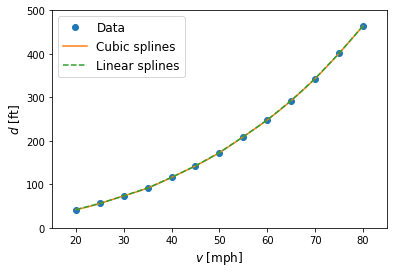

In [21]:
plt.plot(x2,y2,'o', label='Data')
plt.plot(xpred2, ypred2, '-', label='Cubic splines')
plt.plot(xpred2, ypred2_linear, '--', label='Linear splines')
plt.xlim(15,85)
plt.ylim(0,500)
plt.xlabel('$v$ [mph]',fontsize=12)
plt.ylabel('$d$ [ft]',fontsize=12)
plt.legend(fontsize=12);

For smoothly changing functions, they are pretty much the same

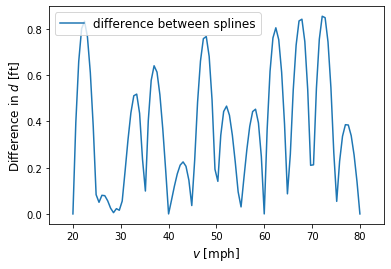

In [22]:
spline_diffs = abs(ypred2 - ypred2_linear)
plt.plot(xpred2, spline_diffs, '-', label='difference between splines')
plt.xlim(15,85)
#plt.ylim(0,500)
plt.xlabel('$v$ [mph]',fontsize=12)
plt.ylabel('Difference in $d$ [ft]',fontsize=12)
plt.legend(fontsize=12);

## Approximating an integral

The idea here is to use the spline model to approximate a definite integral of the function $d(v)$

$$ \int_{v_1}^{v_2} d(v) dv $$

The splines have an analytic form, but it is much simpler to set up a numerical approximation scheme to calculate the integral using the spline model.

For a function $f(x) \geq 0$ the integral 

$$ \int_{x_{\text{start}}}^{x_{\text{end}}} f(x) dx $$

can be approximated as the area under the curve between $x_1$ and $x_2$.

Divide the interval $x_{\text{start}}$ to $x_{\text{end}}$ into $N$ even intervals. There will be $N+1$ $x$ values in that interval starting with $x_{\text{start}}$ all the way up to $x_{\text{end}}$. So we have $x_{\text{start}}, x_1, x_2, x_3, \ldots, x_{N-2}, x_{N-1}, x_{\text{end}}$. Let $x_{\text{start}} = x_0$ and $x_{\text{end}} = x_N$

One way of computing an integral numerically is using the trapezoid rule. The trapezoid rule treats the area in each evenly spaced interval from  $[x_i, x_{i+1}]$ as the area within a trapezoid with heights on each side of $f(x_i)$ and $f(x_{i+1})$. (This is actually related to linear splines)

Using the trapezoid rule, the integral is approximated as

$$ \int_{x_{\text{start}}}^{x_{\text{end}}} f(x) dx \approx
\sum_{i=1}^N \frac{1}{2}(f(x_{i-1}) + f(x_i))(x_i - x_{i-1}) $$

The larger the number of intervals $N$, the better your approximation will be.

### For the above example

Let's use the trapezoid rule, along with the interpolating functions we developed above to compute the integral

$$ \int_{22}^{67} d(v) dv $$

We'll need to split the interval from 22 to 67 into equally spaced sub-intervals. We can do this by letting the spacing be

$$ \Delta v = \frac{67-22}{N} $$

So if $N=100$, the spacing will be

$$ \Delta v = \frac{67-22}{100} = 0.45 $$

Then our integral will be approximated

$$ \int_{22}^{67} d(v) dv \approx \sum_{i=1}^{100} \frac{1}{2}(d(v_{i-1}) + d(v_i))(0.45) $$

In [23]:
vstart = 22
vend = 67
N_intervals = 500

# construct array of values for v to evaluate the function
v_vals = np.linspace(vstart, vend, num=N_intervals+1) 
# note that you use N_intervals+1 because for N intervals, you will have N+1 points

spacing = (vend - vstart)/N_intervals

Check v array and spacing to ensure it's correct

In [24]:
#print(v_vals)
print(spacing)

0.09


In [25]:
# use the linear spline interpolating function
integral_val = 0.0
for i in range(1,N_intervals+1):
    integral_val += 0.5 * (splines2(v_vals[i-1]) + splines2(v_vals[i]))*spacing

In [26]:
print('Approximate value of integral from', vstart, 'to', vend)
print('{:.10f}'.format(integral_val))

Approximate value of integral from 22 to 67
6886.4218625793


In [27]:
# use the cubic spline interpolating function
integral_val2 = 0.0
for i in range(1,N_intervals+1):
    integral_val2 += 0.5 * (splines3(v_vals[i-1]) + splines3(v_vals[i]))*spacing

In [28]:
print('Approximate value of integral from', vstart, 'to', vend)
print('{:.10f}'.format(integral_val2))

Approximate value of integral from 22 to 67
6901.8552900000


Try experimenting with changing the number of intervals above and see if the answers change very much

## Improvement of integral estimate with N

How does the estimate of the integral's value improve with increasing the number of intervals we split the function into, and how does it depend on which interpolating method we use?

In [29]:
def trapezoid_rule(func_in, N_in, x_i, x_f):
    Delta_x = (x_f - x_i)/N_in
    x_pts = np.linspace(x_i, x_f, N_in+1)
    int_val = 0.0
    for i in range(0, N_in):
        int_val += 0.5 * (func_in(x_pts[i+1])+func_in(x_pts[i]))\
                  * Delta_x
    return int_val

In [30]:
N_vals = np.arange(10,100+1)
n_N_vals = len(N_vals)
cubic_splines_results = np.empty(n_N_vals)
linear_splines_results = np.empty(n_N_vals)

In [31]:
for i in range(0,n_N_vals):
    cubic_splines_results[i] = trapezoid_rule(splines3, N_vals[i],vstart, vend)
    linear_splines_results[i] = trapezoid_rule(splines2, N_vals[i],vstart, vend)    

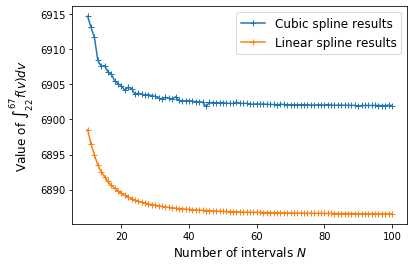

In [32]:
plt.plot(N_vals, cubic_splines_results, '-+', label='Cubic spline results')
plt.plot(N_vals, linear_splines_results, '-+', label='Linear spline results')
#plt.xlim(15,85)
#plt.ylim(6800,7000)
plt.xlabel('Number of intervals $N$',fontsize=12)
plt.ylabel('Value of $\int_{22}^{67} f(v) dv$',fontsize=12)
plt.legend(fontsize=12);